<a href="https://colab.research.google.com/github/Raagulbharatwaj/Understaning-Deep-Learning/blob/main/Mastering_Deep_Learning_The_Art_of_Approximating_Non_Linearities_with_Piecewise_Estimations_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# creates 10000 equally distanced points between -10 and 10
x = np.linspace(-10,10,num=10000)

In [3]:
y1 = -2 * x + 3
y2 = x/x
y3 = 0.5 * x - 2

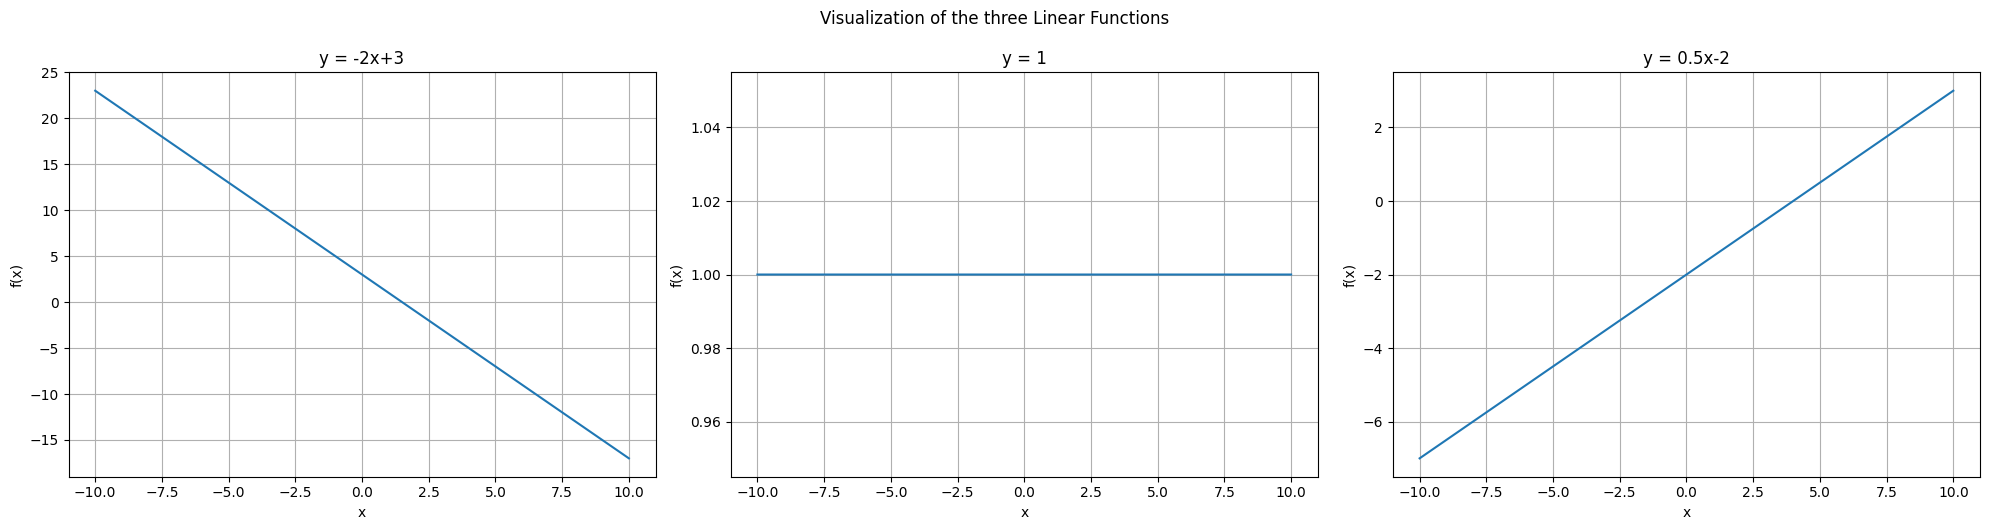

In [4]:
plt.figure(figsize=(20, 5))

# Subplot 1: Negative Slope Line
plt.subplot(131)
plt.plot(x,y1)
plt.title("y = -2x+3")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)

# Subplot 2: Zero Slope Line
plt.subplot(132)
plt.plot(x, y2)
plt.title("y = 1")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)

# Subplot 3: Mixed Slope Line
plt.subplot(133)
plt.plot(x, y3)
plt.title("y = 0.5x-2")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot

plt.suptitle("Visualization of the three Linear Functions", y=1.05)
plt.show()

In [5]:
y = 7*y1-(7/13)*y2+4*y3

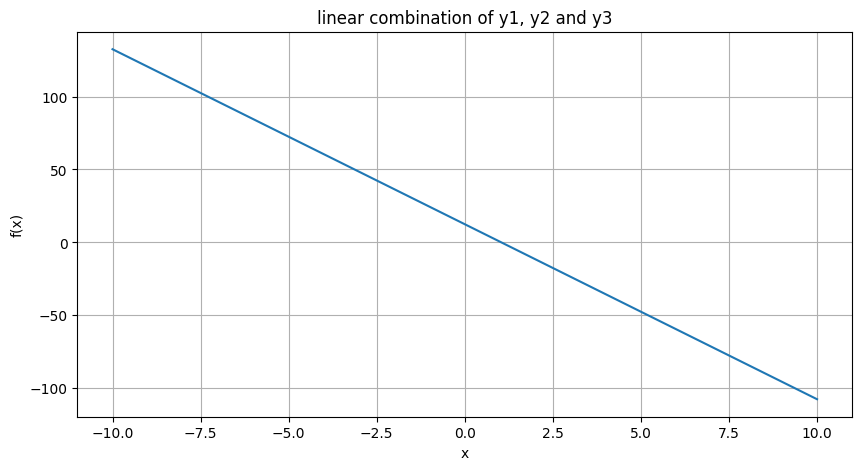

In [6]:
plt.figure(figsize=(10, 5))
plt.plot(x,y)
plt.title("linear combination of y1, y2 and y3")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.show()

In [7]:
# Define ReLU activation function
def relu(x):
    return np.maximum(0, x)

# Define Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [8]:
h1 = relu(y1)
h2 = relu(y2)
h3 = relu(y3)

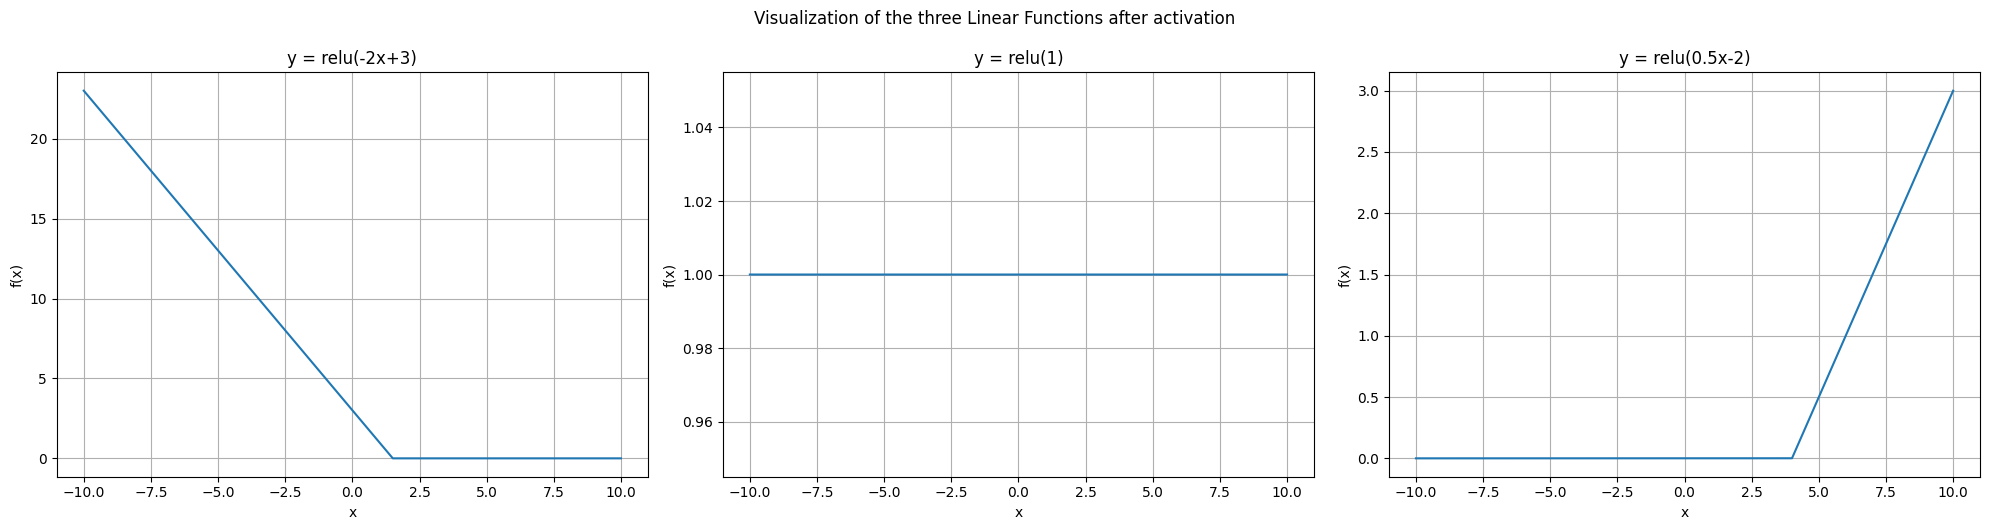

In [9]:
plt.figure(figsize=(20, 5))

# Subplot 1: Negative Slope Line
plt.subplot(131)
plt.plot(x,h1)
plt.title("y = relu(-2x+3)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)

# Subplot 2: Zero Slope Line
plt.subplot(132)
plt.plot(x, h2)
plt.title("y = relu(1)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)

# Subplot 3: Mixed Slope Line
plt.subplot(133)
plt.plot(x, h3)
plt.title("y = relu(0.5x-2)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot

plt.suptitle("Visualization of the three Linear Functions after activation", y=1.05)
plt.show()

In [10]:
y = 7*h1-(7/13)*h2+4*h3

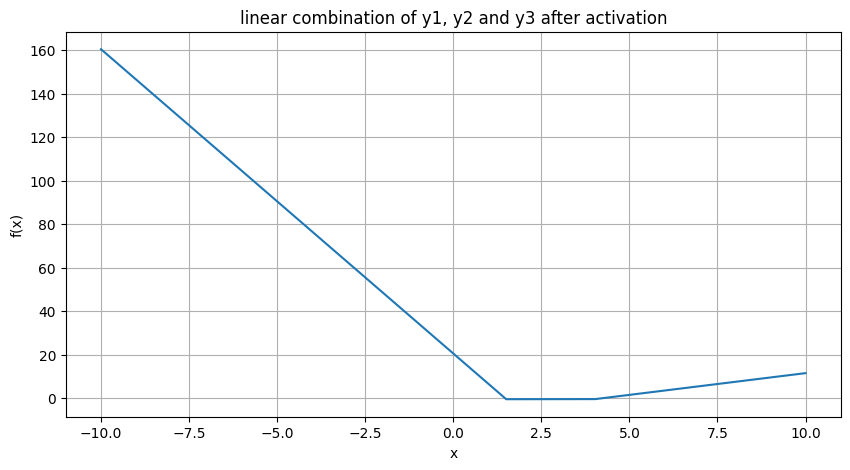

In [11]:
plt.figure(figsize=(10, 5))
plt.plot(x,y)
plt.title("linear combination of y1, y2 and y3 after activation")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.show()

In [12]:
h1 = sigmoid(y1)
h2 = sigmoid(y2)
h3 = sigmoid(y3)

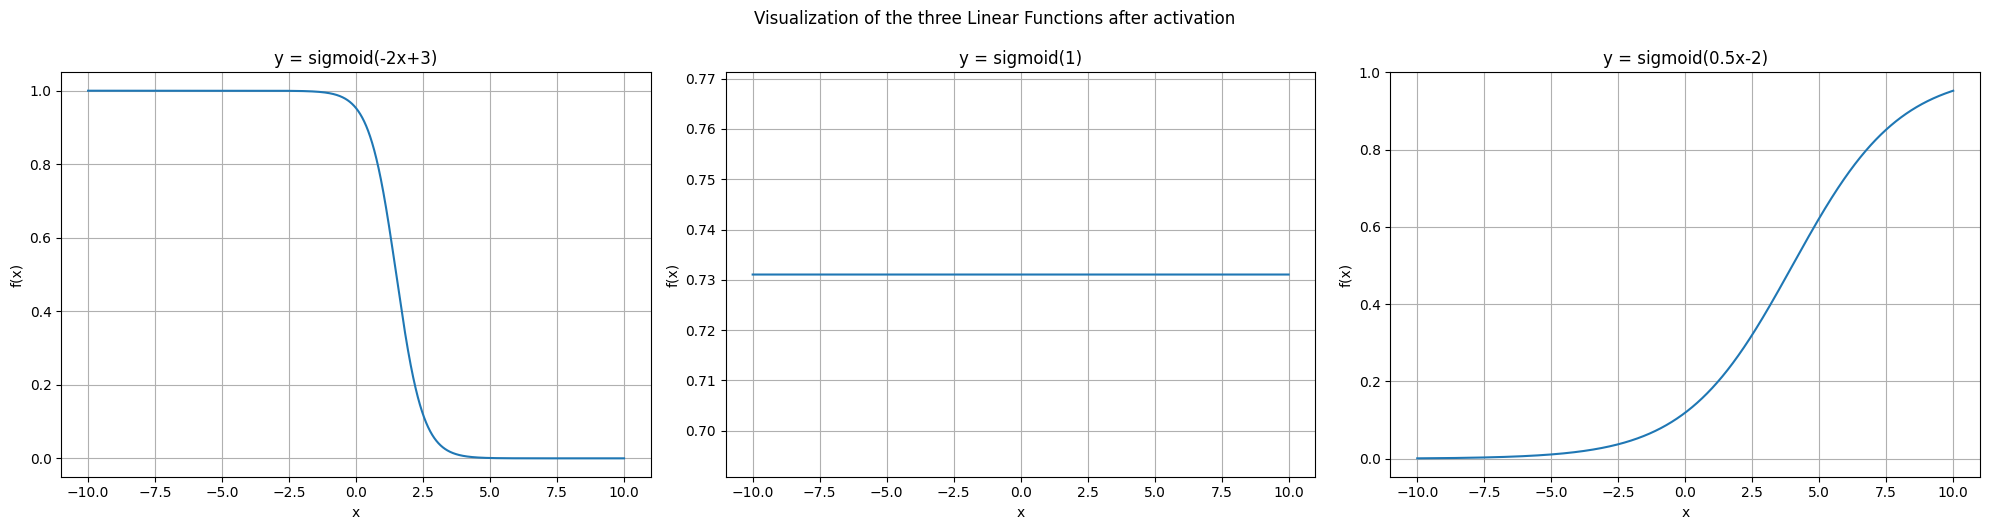

In [13]:
plt.figure(figsize=(20, 5))

# Subplot 1: Negative Slope Line
plt.subplot(131)
plt.plot(x,h1)
plt.title("y = sigmoid(-2x+3)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)

# Subplot 2: Zero Slope Line
plt.subplot(132)
plt.plot(x, h2)
plt.title("y = sigmoid(1)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)

# Subplot 3: Mixed Slope Line
plt.subplot(133)
plt.plot(x, h3)
plt.title("y = sigmoid(0.5x-2)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot

plt.suptitle("Visualization of the three Linear Functions after activation", y=1.05)
plt.show()

In [14]:
y = 7*h1-(7/13)*h2+4*h3

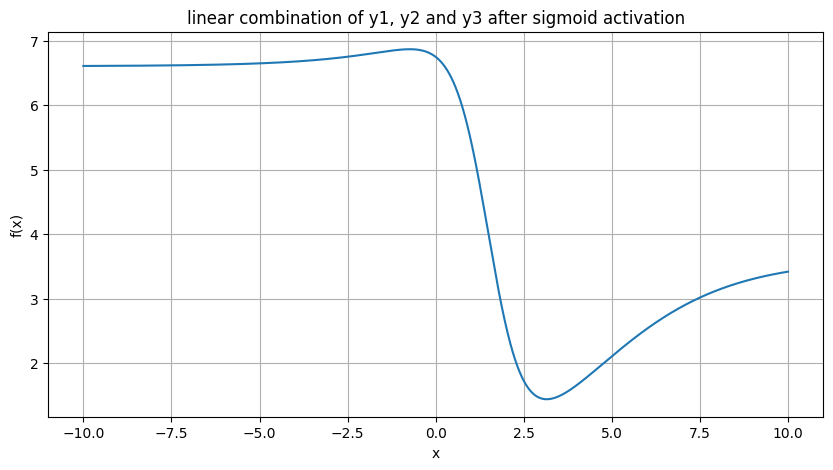

In [15]:
plt.figure(figsize=(10, 5))
plt.plot(x,y)
plt.title("linear combination of y1, y2 and y3 after sigmoid activation")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.show()

In [16]:
num_examples = 100000
x = np.linspace(-2 * np.pi, 2 * np.pi, num_examples)

In [17]:
y = np.sin(x)

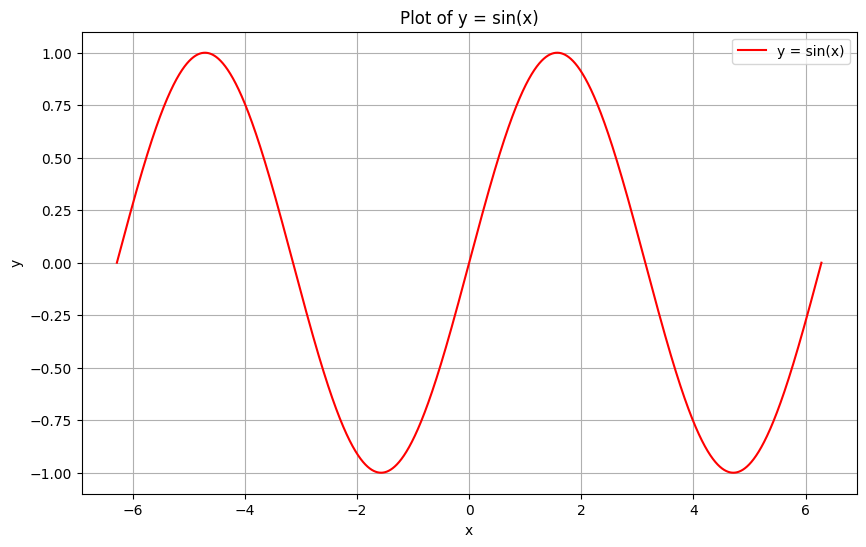

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='y = sin(x)', color='red', linestyle='-')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = sin(x)')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
def create_shallow_nn(k):
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(1,)),  # Input layer
        tf.keras.layers.Dense(k, activation='relu'),  # Hidden layer with k neurons and ReLU activation
        tf.keras.layers.Dense(1)  # Output layer with 1 neuron
    ])
    model.compile(optimizer='adam', loss='mse')  # Mean squared error loss
    return model

In [20]:
def visualize_piecewise_estimation(model, x_values, y_true):
    y_pred = model.predict(x_values)

    plt.figure(figsize=(12, 6))
    plt.title('Piecewise Estimation of Output')
    plt.plot(x_values, y_true, label='True Output', linestyle='--')
    plt.plot(x_values, y_pred, label='Predicted Output')
    plt.xlabel('Input (x)')
    plt.ylabel('Output (y)')
    plt.legend()
    plt.show()

In [21]:
model = create_shallow_nn(5)

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 10        
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 16 (64.00 Byte)
Trainable params: 16 (64.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
model.fit(x, y, epochs=5)

Epoch 1/5
3125/3125 [==============================] - 13s 4ms/step - loss: 0.6812
Epoch 2/5
3125/3125 [==============================] - 6s 2ms/step - loss: 0.1597
Epoch 3/5
3125/3125 [==============================] - 6s 2ms/step - loss: 0.1404
Epoch 4/5
3125/3125 [==============================] - 5s 2ms/step - loss: 0.1390
Epoch 5/5
3125/3125 [==============================] - 5s 2ms/step - loss: 0.1387


3125/3125 [==============================] - 5s 2ms/step


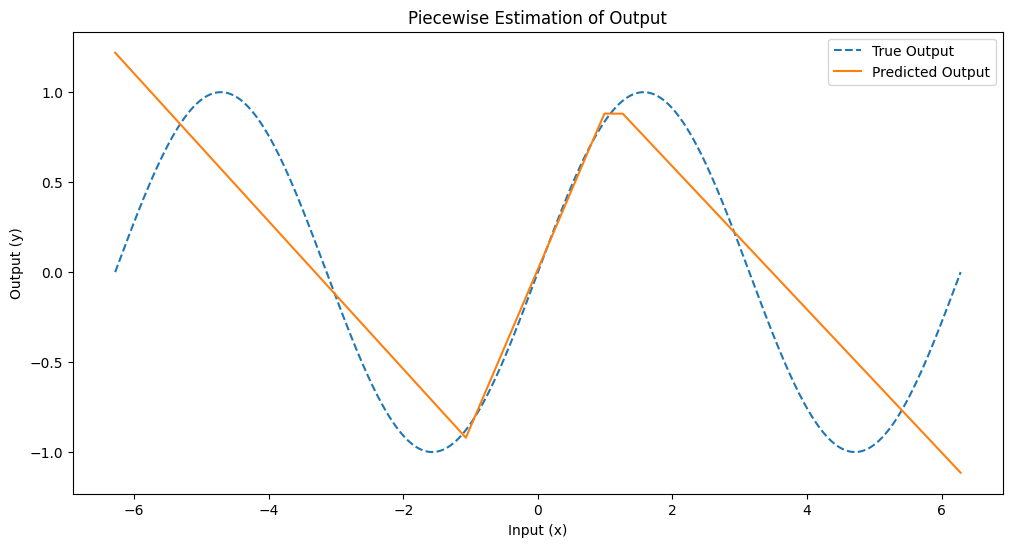

In [24]:
visualize_piecewise_estimation(model,x,y)

In [25]:
model = create_shallow_nn(50)

In [26]:
model.fit(x, y, epochs=5)

Epoch 1/5
3125/3125 [==============================] - 6s 2ms/step - loss: 0.1581
Epoch 2/5
3125/3125 [==============================] - 6s 2ms/step - loss: 0.1409
Epoch 3/5
3125/3125 [==============================] - 5s 2ms/step - loss: 0.1405
Epoch 4/5
3125/3125 [==============================] - 6s 2ms/step - loss: 0.1383
Epoch 5/5
3125/3125 [==============================] - 5s 2ms/step - loss: 0.0991


3125/3125 [==============================] - 5s 2ms/step


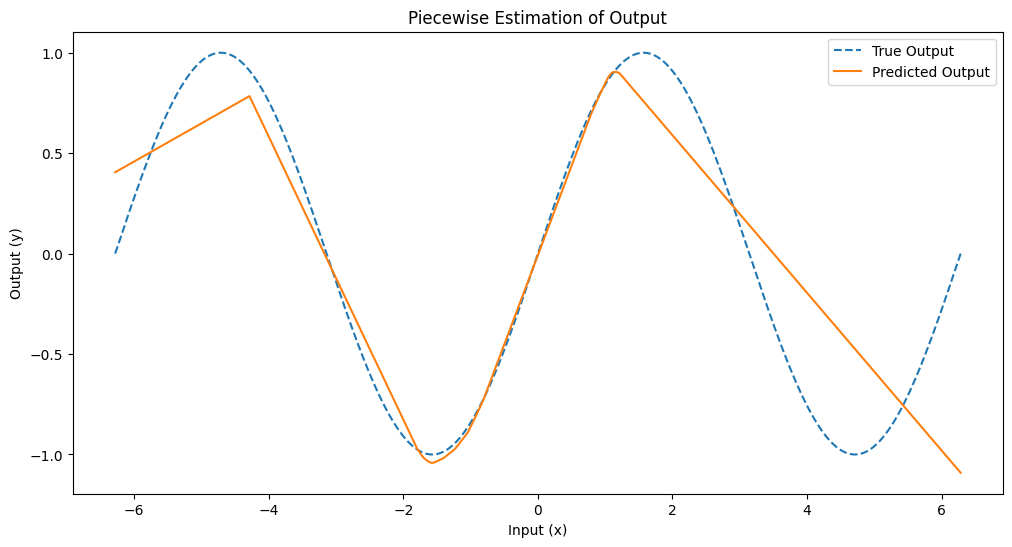

In [27]:
visualize_piecewise_estimation(model,x,y)

In [28]:
model = create_shallow_nn(500)

In [29]:
model.fit(x, y, epochs=5)

Epoch 1/5
3125/3125 [==============================] - 8s 2ms/step - loss: 0.1425
Epoch 2/5
3125/3125 [==============================] - 5s 2ms/step - loss: 0.0939
Epoch 3/5
3125/3125 [==============================] - 6s 2ms/step - loss: 0.0615
Epoch 4/5
3125/3125 [==============================] - 6s 2ms/step - loss: 0.0088
Epoch 5/5
3125/3125 [==============================] - 5s 2ms/step - loss: 0.0027


3125/3125 [==============================] - 5s 2ms/step


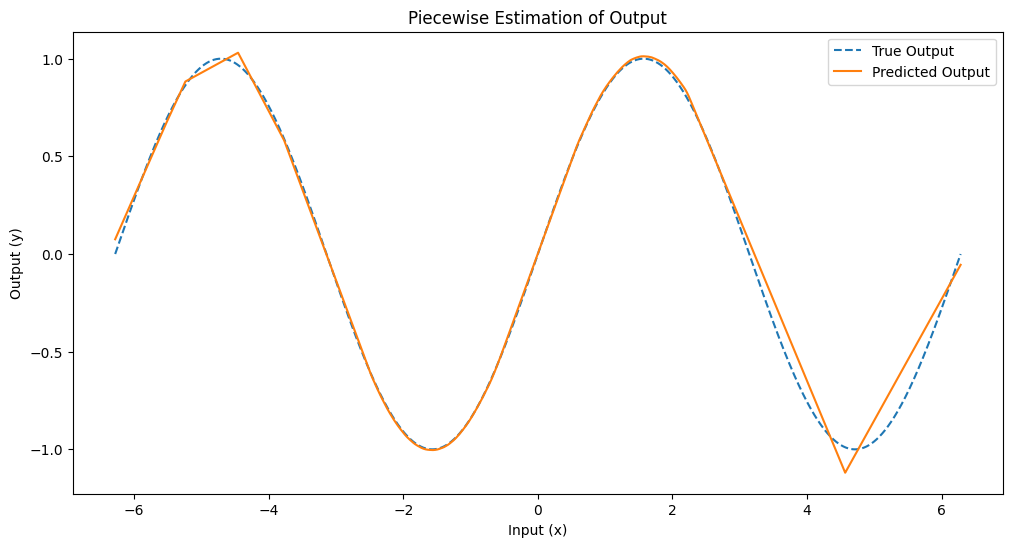

In [30]:
visualize_piecewise_estimation(model,x,y)

In [31]:
model = create_shallow_nn(1500)

In [32]:
model.fit(x, y, epochs=5)

Epoch 1/5
3125/3125 [==============================] - 6s 2ms/step - loss: 0.1077
Epoch 2/5
3125/3125 [==============================] - 7s 2ms/step - loss: 0.0085
Epoch 3/5
3125/3125 [==============================] - 5s 2ms/step - loss: 9.3915e-04
Epoch 4/5
3125/3125 [==============================] - 7s 2ms/step - loss: 4.7890e-04
Epoch 5/5
3125/3125 [==============================] - 6s 2ms/step - loss: 5.0250e-04


3125/3125 [==============================] - 5s 2ms/step


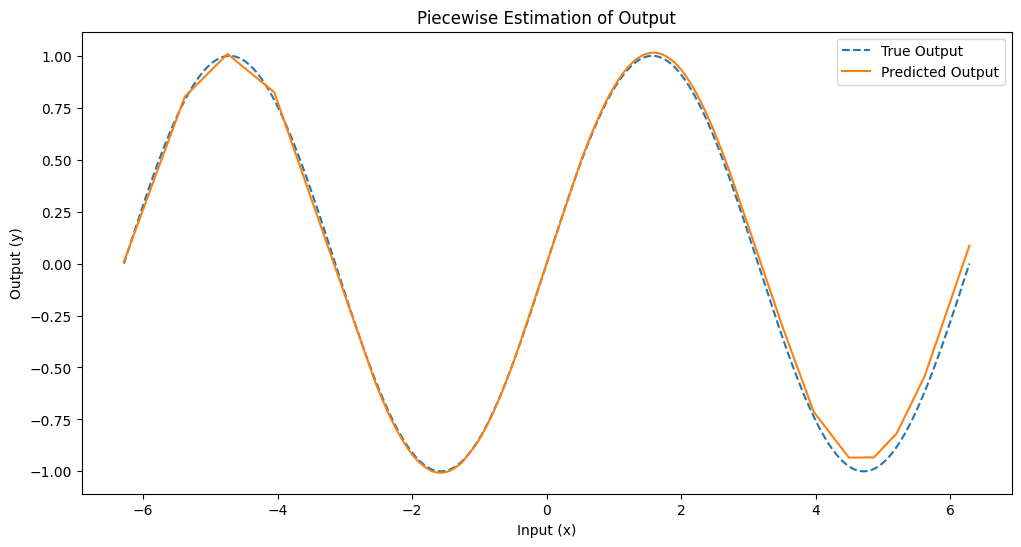

In [33]:
visualize_piecewise_estimation(model,x,y)

In [34]:
def create_shallow_nn(k):
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(1,)),  # Input layer
        tf.keras.layers.Dense(k, activation='sigmoid'),  # Hidden layer with k neurons and ReLU activation
        tf.keras.layers.Dense(1)  # Output layer with 1 neuron
    ])
    model.compile(optimizer='adam', loss='mse')  # Mean squared error loss
    return model

In [35]:
model = create_shallow_nn(1500)

In [36]:
model.fit(x, y, epochs=5)

Epoch 1/5
3125/3125 [==============================] - 8s 2ms/step - loss: 0.4481
Epoch 2/5
3125/3125 [==============================] - 6s 2ms/step - loss: 0.1878
Epoch 3/5
3125/3125 [==============================] - 8s 2ms/step - loss: 0.1263
Epoch 4/5
3125/3125 [==============================] - 7s 2ms/step - loss: 0.0828
Epoch 5/5
3125/3125 [==============================] - 8s 3ms/step - loss: 0.0557


3125/3125 [==============================] - 6s 2ms/step


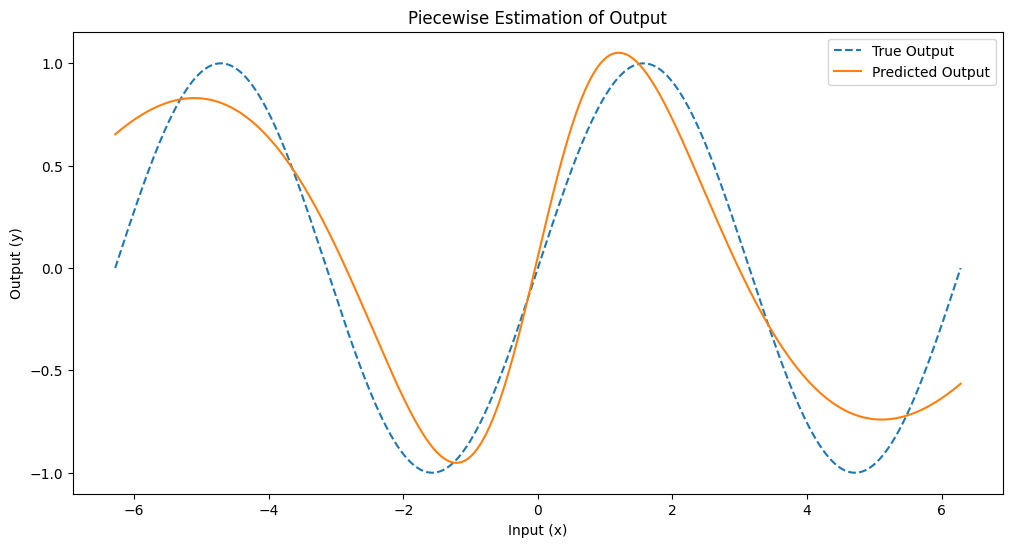

In [37]:
visualize_piecewise_estimation(model,x,y)

In [38]:
def create_shallow_nn(k):
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(1,)),  # Input layer
        tf.keras.layers.Dense(k, activation='tanh'),  # Hidden layer with k neurons and ReLU activation
        tf.keras.layers.Dense(1)  # Output layer with 1 neuron
    ])
    model.compile(optimizer='adam', loss='mse')  # Mean squared error loss
    return model

In [39]:
model = create_shallow_nn(1500)

In [40]:
model.fit(x, y, epochs=5)

Epoch 1/5
3125/3125 [==============================] - 7s 2ms/step - loss: 0.2354
Epoch 2/5
3125/3125 [==============================] - 7s 2ms/step - loss: 0.0659
Epoch 3/5
3125/3125 [==============================] - 7s 2ms/step - loss: 0.0374
Epoch 4/5
3125/3125 [==============================] - 7s 2ms/step - loss: 0.0250
Epoch 5/5
3125/3125 [==============================] - 7s 2ms/step - loss: 0.0113


3125/3125 [==============================] - 6s 2ms/step


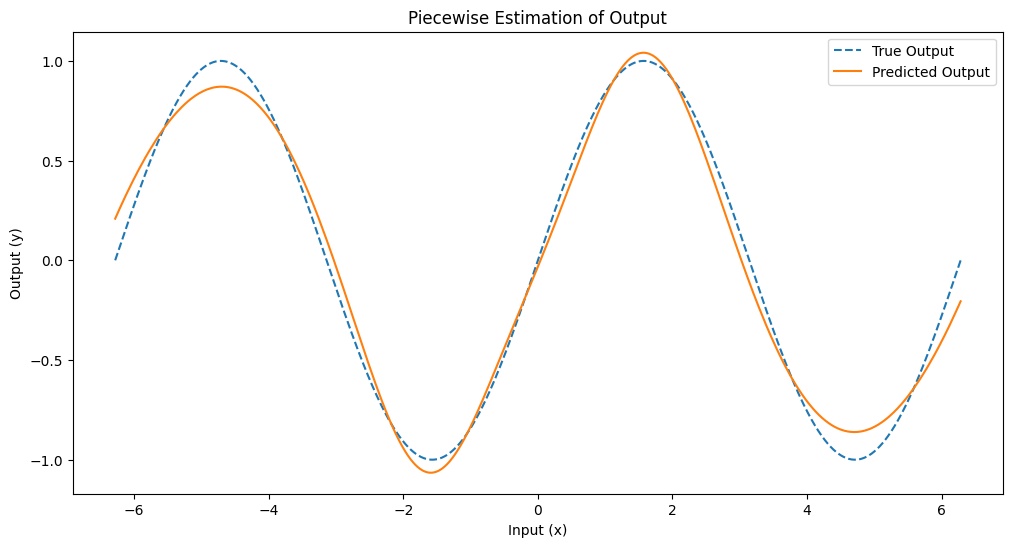

In [41]:
visualize_piecewise_estimation(model,x,y)